# Phonon-Vibration-Viewer (combined with [neuroevolution potential - NEP](https://gpumd.org/nep/index.html))

**Visualizing lattice vibration information from phonon dispersion for primitive atoms.**

### Author: _[Ting Liang](https://scholar.google.com/citations?hl=zh-CN&user=4ei1O30AAAAJ)_
Department of Electronic Engineering, The Chinese University of Hong Kong, Hong Kong SAR, China.

Email: liangting.zj@gmail.com

## 1. Introduction
* In this tutorial, we will introduce how to obtain the lattice vibration information and visualize it on atoms by using [OVITO](https://www.ovito.org/about/).
  
* Visualizing information about lattice vibrations on the atoms helps to determine whether the atomic vibrations follow a collective mode or are disordered. Furthermore, it is possible to determine whether phonons at a specific frequency are in propagation mode or localized mode.
If one needs further information, one can refer to the literature ([Liang 2022](https://www.sciencedirect.com/science/article/pii/S2542529322001031),  [Ying 2022](https://www.sciencedirect.com/science/article/pii/S0017931022011498), [Zeng 2025](https://arxiv.org/abs/2407.18510), [Zhang 2021](https://pubs.acs.org/doi/abs/10.1021/acsami.1c08131), and [Xiong 2016](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.025503)).

* In this tutorial, I will explain step by step how to visualize lattice vibrations using an [orthogonal diamond nanowire](https://www.sciencedirect.com/science/article/pii/S2542529322001031) (DNW, see below, panel **d**) as an example ([Liang 2022](https://www.sciencedirect.com/science/article/pii/S2542529322001031)). If one is to use this method, it is highly recommended to cite [this work](https://www.sciencedirect.com/science/article/pii/S2542529322001031).
<p align="center">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S2542529322001031-gr3_lrg.jpg" alt="5FT-DNW" width="500">
</p>


* In the 2022 study, the DNWs were modeled using the Tersoff potential. Here, we attempt to reproduce the results from that work using the [NEP](https://gpumd.org/nep/index.html) model. Specifically, we adopt the general-purpose NEP potential for carbon trained by [Fan et al.](https://doi.org/10.1088/1361-648X/ad31c2) ([C_2024_NEP4.txt](https://github.com/brucefan1983/GPUMD/blob/master/potentials/nep/C_2024_NEP4.txt)).


## 2. Required Software Packages

| Softwares | Links |
|:----------|:------|
| GPUMD & NEP     | [GitHub](https://github.com/brucefan1983/GPUMD) |
| calorine  | [Website](https://calorine.materialsmodeling.org/) |
| Phonopy   | [Documentation](https://phonopy.github.io/phonopy/index.html) |
| ASE       | [Wiki](https://wiki.fysik.dtu.dk/ase/) |
| OVITO       | [Link](https://www.ovito.org/) |


## 3. Workflow Overview

Below is a brief overview of the workflow for visualizing phonon vibrations using the NEP model:

1. **Prepare the input structure file** of the unit cell you wish to analyze. Any format readable by [ASE](https://wiki.fysik.dtu.dk/ase/) is acceptable, such as `POSCAR`, `.xyz`, etc.

2. **Run the [`get_phonon_dispersion.py`](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/get_phonon_dispersion.py) script** in the working directory to compute the phonon dispersion using the NEP model via [Calorine](https://calorine.materialsmodeling.org/). This will generate a [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file.

3. **Identify the q-point and frequency** you want to visualize, then execute the `view_eigen.py` script to generate the corresponding `.xyz` animation file.

4. **Open the `.xyz` file in [OVITO](https://www.ovito.org/)** to visualize the lattice vibration modes interactively.

This approach enables intuitive and customizable animations of phonon modes along arbitrary q-point paths. Next, we will walk you through each step of the workflow and explain the associated files in detail.


## 4. Calculate phonon dispersion and generate [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) 
* Firstly, we need to calculate the phonon dispersion and output the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file of DNWs, using the NEP model.
  
* We now utilize the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file generated by [`get_phonon_dispersion.py`](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/get_phonon_dispersion.py) and perform post-processing to enable the visualization of lattice vibrations along **arbitrary q-point paths**. This approach allows for intuitive and dynamic animations of phonon modes across the Brillouin zone. 

### 4.1. Preparing the Inputs

* Prepare the [POSCAR](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/Fivefold3_POSCAR) file of the DNWs (see POSCAR_DNWs file in the folder). 
   ```
   POSCAR file written by Ovito Pro 3.0.0-dev766
   1
   21.69 0.0 0.0
   0.0 2.5562 0.0
   0.0 0.0 19.8248 
   C
   192
   Direct
   0.0 0.0 0.06447
   0.0833333333 0.5 0.0
   0.0 0.0 0.18947
   0.0833333333 0.5 0.125
   0.0 0.0 0.31447
   0.0833333333 0.5 0.25
   0.0 0.0 0.43947
   ..............
   ```
   
This unit cell contains `192` atoms.

### 4.2. Installed the required packages

* Step 1: Install [Calorine](https://calorine.materialsmodeling.org/get_started/installation.html). Here, we demonstrate in the conda environment.

In [4]:
pip install calorine

Note: you may need to restart the kernel to use updated packages.


* Step 2: Install [Phonopy](https://phonopy.github.io/phonopy/install.html). Here, we use conda.
  
* You need to restart Jupyter at this stage so that the newly installed environment is applied.

In [3]:
conda install -c conda-forge phonopy -y

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.





### 4.3. Run the **`get_phonon_dispersion.py`** script in the working directory to compute the phonon dispersion.

📘 **How to Use `get_phonon_dispersion.py`**


This script is designed to compute the phonon dispersion of a given structure. It first performs structural relaxation using [Calorine](https://calorine.materialsmodeling.org/), and then calculates the phonon band structure using [Phonopy](https://phonopy.github.io/phonopy/index.html). The final output includes the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file, which is essential for visualization and further analysis.

We strongly encourage users to read through the script carefully. Its logic is straightforward and modular, making it easy to modify and extend.

🔧 **Key Parameters to Modify**

To run the script, you only need to edit the code block between lines **267–277**:

    if __name__ == "__main__":

       # Construct model
       structure_file = 'POSCAR_DNWs'
       repeat_supercell = [1, 4, 1]
       band_path = [[0.0, 0.0, 0.0], [0.0, 0.5, 0.0]]
       band_label = [('Gamma', 'Y')]

       # NEP potential file
       nep_potential_file = 'C_2024_NEP4.txt'

Here’s what each parameter means:

- **structure_file**: Input structure file (usually in POSCAR format).

- **repeat_supercell**: Supercell dimensions used for phonon calculations. Checking the supercell size is crucial for accurate phonon calculations. For reference, see Figure S2 in the following publication: [PYSED: A tool for extracting kinetic energy](https://pubs.aip.org/aip/jap/article/138/7/075101/3359033/PYSED-A-tool-for-extracting-kinetic-energy).

- **band_path**: List of q-points defining the phonon path in reciprocal space.

- **band_label**: Labels for high-symmetry points along the path.
  
- **nep_potential_file**: NEP potential file used for atomic interactions.
  
These are the only parameters you need to modify for most use cases. The script also contains many hidden features that advanced users can explore.

▶️ **Running the Script**


********* Using NEP potential **********
pressure before:  0.648878 GPa
******** Start relax structure, wait !!!!! *********
******** Relax ALL Done !!!!! *********
pressure after relax: -0.000000 GPa
******** Processing phonon information, wait !!!!! *********
******** band.yaml file is written successfully **********
********* Save band-structure file successfully *********
***************** Calculation ALL Done !!! *****************


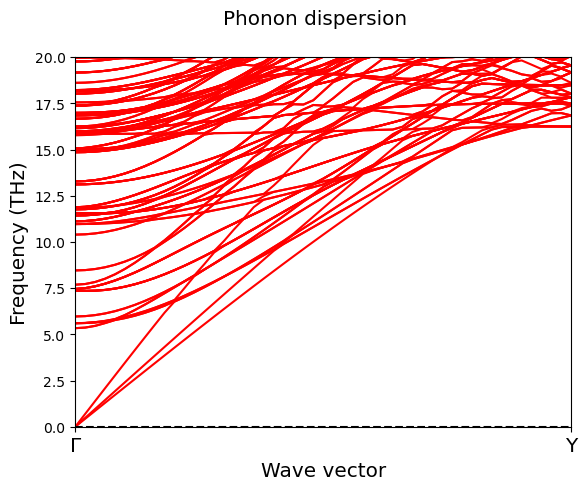

In [6]:
%run get_phonon_dispersion.py

* Since the phonon dispersion in the [Liang 2022 Fig. 5d](https://www.sciencedirect.com/science/article/pii/S2542529322001031#fig5) was calculated using the Tersoff potential generated by [Lammps](https://www.lammps.org/) to [Phonopy](https://phonopy.github.io/phonopy/). 

* Here, we are using the [NEP model](https://github.com/brucefan1983/GPUMD/blob/master/potentials/nep/C_2024_NEP4.txt) of machine learning, and the dispersion relationship diagram has changed accordingly. However, as a tutorial for visualizing atomic vibrations, it is fine.
  
* Once configured, simply run the script. Upon completion, it will generate the following output files:

| File Name | Description |
|:----------|:------|
| `Phonon_dispersion.png`     | Plot of the phonon dispersion curve |
| `band_structure.txt`  | Raw data of the dispersion. First column: q-path; remaining columns: frequencies |
| `band.yaml`   | YAML-formatted phonon data |
| `qx_axis_data.txt` | Position of each high-symmetry point along the q-path. Useful for plotting |

Note: The number of q-points along the path is set to `51` by default, but this can be changed by the user.


🎞️ **Visualizing Eigenvectors**

Once you have the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file, you can use the `view_eigen.py` script to generate .xyz animation files that visualize the phonon eigenvectors in [OVITO](https://www.ovito.org/).

## 5. View (generate the .xyz and feed to [Ovito](https://www.ovito.org/about/))

### 5.1 Run the [view_eigen.py](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/view_eigen.py) file

* Here, we will used the [view_eigen.py](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/view_eigen.py) file to process the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file and to generate the `.xyz` file . 


* This `.xyz` file contains two frames with the position coordinates of the atoms, the first frame being the original atomic coordinates. The second frame is the atomic coordinates with the eigenvectors (**plus**). Thus, using ovtio's [Displacement vectors](file:///C:/Program%20Files/Ovito/doc/manual/html/display_objects.vectors.html) feature, we can visualize the eigenvectors. And with [Ovito](https://www.ovito.org/about/), we can output great-looking images.


* In the following, we will describe two simple parameters that need to be modified in the [view_eigen_gpumd.py](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/view_eigen_gpumd.py).

In [10]:
# %load view_eigen.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
@author: LiangTing
23/9/2025 23:26:57
"""

import numpy as np
import os
from ase.io import read, write

def get_frequency_eigen_info(q_vaule, frequency, eig_file='band.yaml'):
    import yaml
    with open(eig_file, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)             # Load the yaml file and convert it to a dictionary
        qpoints_number = data['nqpoint']     # get number of qpoints used to calculate
        atoms_number = data['natom']         # get number of atoms in poscar
        phonons = data.get('phonon')         # get phonon dictionary
        
        print("\n****** Now we have {} q-points and {} branches for dispersion ******\n".format(qpoints_number, atoms_number*3))

    # for extract eigenvector
    print("***** Dealing {0} qpoint and {1} THz frequency for the structure ! *****\n".format(q_vaule, frequency))
    
    eigenvectors = []
    for phonon in phonons:
        if q_vaule == phonon['distance']:
            for freq_eig in phonon['band']:
                if frequency == freq_eig['frequency']:
                    eigenvectors = freq_eig['eigenvector']
                    break
            break

    return eigenvectors, atoms_number

def position_plus_eigen(structure, eigenvectors, atoms_number):

    if atoms_number != np.size(eigenvectors, 0):
        raise ValueError("The data dimension of the eigenvector is inconsistent with atomic number")
    # deal with eigenvector
    from tqdm import tqdm
    import copy
    positions = structure.get_positions()
    positions_second_frame = copy.deepcopy(positions)
    for i, atom in tqdm(enumerate(eigenvectors), desc="Processing eigenvectors", unit=" atoms"):
        positions_second_frame[i][0] = positions[i][0] + atom[0][0]  # x
        positions_second_frame[i][1] = positions[i][1] + atom[1][0]  # y
        positions_second_frame[i][2] = positions[i][2] + atom[2][0]  # z

    return positions_second_frame

if __name__ == "__main__":

    q_vaule = 0.00   # Get from phonon dispersion
    frequency = 5.3329508737
    
    file = 'POSCAR_DNWs'
    
    structure = read(file)
    
    eigenvectors, atoms_number = get_frequency_eigen_info(q_vaule, frequency)
    
    #print(eigenvectors)
    
    positions_second_frame = position_plus_eigen(structure, eigenvectors, atoms_number)
    # write first frame
    write("eigen_DNWs_Gamma_qpoint-{:0.6f}.xyz".format(q_vaule), structure, append=False)
    	
    # write second frame
    structure.set_positions(positions_second_frame)
    write("eigen_DNWs_Gamma_qpoint-{:0.6f}.xyz".format(q_vaule), structure, append=True)

    print('\n******************** All Done !!! *************************')


****** Now we have 51 q-points and 576 branches for dispersion ******

***** Dealing 0.0 qpoint and 5.3329508737 THz frequency for the structure ! *****



Processing eigenvectors: 192 atoms [00:00, 622338.77 atoms/s]


******************** All Done !!! *************************


This script visualizes atomic displacements corresponding to a specific phonon mode at a chosen `q-point`. 

Below are the meanings of the three core parameters:

**1. `q_vaule` — Q-point Value**
   
This represents the specific q-point along the phonon dispersion path that you want to visualize.
- For example, if you're visualizing the Γ point, set `q_vaule = 0.00`.
- You can find the list of q-point values in the first column of `band_structure.txt`.
- These values correspond directly to entries in band.yaml, which contains detailed phonon data.
  
**2. `frequency` — Phonon Mode Frequency**
   
This is the frequency of the phonon mode you want to visualize at the selected q-point.

- In the example, we visualize the first optical mode at the Gamma point, which has a frequency of `5.3329508737` THz.
- You can find this value in `band_structure.txt`, typically in the **2nd to 3N-th columns** (where N is the number of atoms).
- Alternatively, you can locate it in the [`band.yaml`](https://phonopy.github.io/phonopy/output-files.html#band-yaml) file under the corresponding q-point.
  
💡 Tip: If you're targeting a high-symmetry point, you can also refer to `qx_axis_data.txt` for guidance.

**3. `file` — Input Structure File**

This is the name of the input structure file, typically in `POSCAR` format. In this case, the file is named `POSCAR_DNWs`. Of course, it also supports other formats.


In [9]:
%run view_eigen.py


****** Now we have 51 q-points and 576 branches for dispersion ******

***** Dealing 0.0 qpoint and 5.3329508737 THz frequency for the structure ! *****



Processing eigenvectors: 192 atoms [00:00, 753326.82 atoms/s]


******************** All Done !!! *************************


* Here, a output file with the frequency name ([eigen_DNWs_Gamma_qpoint-0.000000.xyz](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/3.3775THz_dump_for_visualization.eigen)) would be generate. Then, one can use it to view the lattice vibration by using [Ovito](https://www.ovito.org/about/). 

### 5.2 View the lattice vibration (using the [.xyz file](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/eigen_DNWs_Gamma_qpoint-0.000000.xyz))

Learn to use ovito's [Displacement vectors](file:///C:/Program%20Files/Ovito/doc/manual/html/display_objects.vectors.html) feature.

🎥 **Visualizing Phonon Eigenvectors in [OVITO](https://www.ovito.org/about/)**

To visualize atomic vibration eigenvectors using [OVITO](https://www.ovito.org/about/), follow these simple steps:

**1. Load the Structure File**
   
Drag and drop the file [eigen_DNWs_Gamma_qpoint-0.000000.xyz](https://github.com/Tingliangstu/Phonon-Vibration-Viewer/blob/main/calculate%20phonon%20dispersion/3.3775THz_dump_for_visualization.eigen) into [OVITO](https://www.ovito.org/about/).

Then click "`Add modification`" as shown below.

<p align="center"><img src="https://raw.githubusercontent.com/Tingliangstu/Phonon-Vibration-Viewer/main/figure/ovito1.png" alt="ovito1" width="300"></p>

**2. Enable Displacement Vectors**

Check the box for "`Displacement vectors`", and set the source to "`Displacements`".

<p align="center"><img src="https://raw.githubusercontent.com/Tingliangstu/Phonon-Vibration-Viewer/main/figure/ovito4.png" alt="ovito4" width="450"></p>

**3. Adjust Visualization**

With some fine-tuning of the display settings, you’ll be able to generate a clear visualization of the atomic vibrations.

<p align="center"><img src="https://raw.githubusercontent.com/Tingliangstu/Phonon-Vibration-Viewer/main/figure/ovito2.png" alt="ovito2" width="450"></p>

💡 Note: This result differs from previous simulations using the Tersoff potential. As discussed earlier, this example uses the NEP potential, which leads to different vibrational characteristics.

By following the steps above, you should be able to visualize the phonon eigenvectors effectively.
If you have any questions, feel free to reach out to me via email.


## 6. References
* Liang T, Xu K, Han M, et al. [Abnormally High Thermal Conductivity in Fivefold Twinned Diamond Nanowires](https://www.sciencedirect.com/science/article/pii/S2542529322001031). Materials Today Physics, 2022, 25: 100705.
* Ying P, Liang T, Xu K, et al. [Variable thermal transport in black, blue, and violet phosphorene from extensive atomistic simulations with a neuroevolution potential](https://www.sciencedirect.com/science/article/pii/S0017931022011498). npj Computational Materials, 2019, 5(1): 1-6.
* Zeng Z, Fan Z, Simoncelli M, et al. [Lattice distortion leads to glassy thermal transport in crystalline Cs$_3$Bi$2$I$_6$Cl$_3$](https://arxiv.org/abs/2407.18510). arXiv preprint arXiv:2407.18510, 2024.
* Zhang L, Zhong Y, Qian X, et al. [Toward Optimal Heat Transfer of 2D–3D Heterostructures via van der Waals Binding Effects](https://pubs.acs.org/doi/abs/10.1021/acsami.1c08131). ACS Applied Materials & Interfaces, 2021, 13(38): 46055-46064.
* Xiong S, Sääskilahti K, Kosevich Y A, et al. [Blocking phonon transport by structural resonances in alloy-based nanophononic metamaterials leads to ultralow thermal conductivity](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.025503). Physical review letters, 2016, 117(2): 025503.